In [3]:
train_dir = '/Users/user/OneDrive/Documents/archive/train'
test_dir = '/Users/user/OneDrive/Documents/archive/test'

In [4]:
import os
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/train/Butterflies')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/train/Moth')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/test/Butterflies')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/test/Moth')))

101
100
77
71


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary', 
    subset='training'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))   
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_data, epochs=22, validation_data=validation_data)

Epoch 1/22


6/6 [==============================] - 8s 1s/step - loss: 0.8294 - accuracy: 0.5590 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/22
6/6 [==============================] - 5s 1s/step - loss: 0.6953 - accuracy: 0.5217 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 3/22
6/6 [==============================] - 6s 940ms/step - loss: 0.6940 - accuracy: 0.4907 - val_loss: 0.6738 - val_accuracy: 0.6500
Epoch 4/22
6/6 [==============================] - 6s 929ms/step - loss: 0.6238 - accuracy: 0.6646 - val_loss: 0.7244 - val_accuracy: 0.5250
Epoch 5/22
6/6 [==============================] - 5s 765ms/step - loss: 0.6230 - accuracy: 0.5901 - val_loss: 0.6961 - val_accuracy: 0.5500
Epoch 6/22
6/6 [==============================] - 5s 804ms/step - loss: 0.5858 - accuracy: 0.6708 - val_loss: 0.6238 - val_accuracy: 0.7000
Epoch 7/22
6/6 [==============================] - 5s 810ms/step - loss: 0.5232 - accuracy: 0.7453 - val_loss: 0.8025 - val_accuracy: 0.5250
Epoch 8/22
6/6 [========

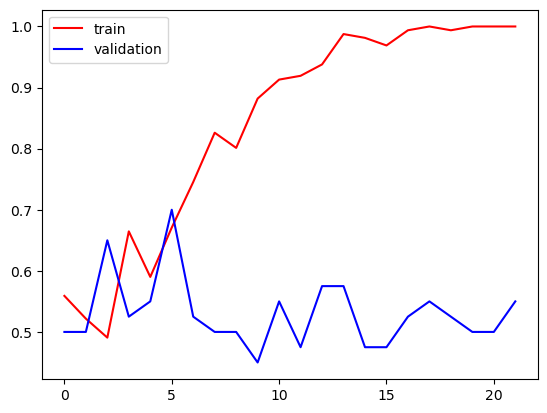

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


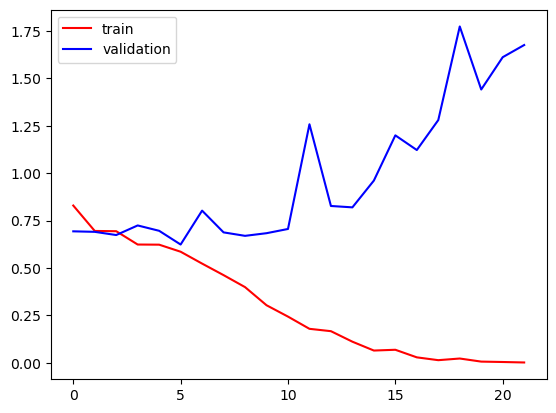

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.


In [13]:
predictions = model.predict(test_data)
print(predictions)


5/5 [==============================] - 2s 356ms/step
[[2.12721943e-06]
 [2.52453060e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999940e-01]
 [1.55641725e-02]
 [1.53154400e-09]
 [1.45293551e-03]
 [7.40965537e-04]
 [9.99980509e-01]
 [9.99983728e-01]
 [9.95155394e-01]
 [9.56580818e-01]
 [2.35589305e-05]
 [2.27981526e-03]
 [9.99809384e-01]
 [9.89857674e-01]
 [1.34110098e-06]
 [1.77001819e-01]
 [9.99961138e-01]
 [9.99996185e-01]
 [2.21182218e-05]
 [8.99311544e-06]
 [4.36082228e-05]
 [1.00000000e+00]
 [9.99999881e-01]
 [4.02441591e-01]
 [1.38386316e-03]
 [1.62713768e-05]
 [2.58331893e-05]
 [3.39093589e-04]
 [9.99999404e-01]
 [9.99996126e-01]
 [3.27121199e-07]
 [9.98789787e-01]
 [9.96139407e-01]
 [5.46345487e-04]
 [5.60588815e-05]
 [2.58248338e-06]
 [9.99999464e-01]
 [9.99103785e-01]
 [9.99888361e-01]
 [1.60786385e-05]
 [2.41595089e-01]
 [5.75415252e-05]
 [1.85243785e-08]
 [5.67037836e-02]
 [9.99999881e-01]
 [8.21600258e-01]
 [2.18234254e-06]
 [7.29582753e-05]
 [1.47622452e-12]
 [3.2725165

In [14]:
len(predictions)

148

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[42 35]
 [37 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        77
           1       0.49      0.48      0.49        71

    accuracy                           0.51       148
   macro avg       0.51      0.51      0.51       148
weighted avg       0.51      0.51      0.51       148

